<a href="https://colab.research.google.com/github/Sammy-Mutua/DSC14B-Machine-Learning-Week-8/blob/main/Copy_of_DSC14B_Machine_Learning_Independent_Project_Week_8_Samuel_Mutua_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Independent Project week 8

## 1. Defining the Question

### a) Specifying the Question


> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. They have stored their findings in the dataset provided. As a data analyst , I am to analyze the data and build a model that will determine whether or not the patient's symptoms indicate that the patient has hypothyroid



### b) Defining the Metric for Success


> An accurate model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### c) Understanding the context 

>Located in Nairobi Kenya, Nairobi Hospital is Opened in 1954, The Nairobi Hospital has excelled in medical expertise and services provision and has deservedly earned recognition throughout East Africa and beyond as an advanced diagnostic, treatment and referral centre. Expansive investment in latest technology and medical equipment has enabled us establish leadership in medical procedures both in Kenya and outside.

> On the hand, Hypothyroidism is a common condition where the thyroid doesn’t create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures.

> The dataset provided for this analysis consists of research findings carried out by Nairobi Hospital and contains symptoms of patients suspected to have hypothyroidism

### d) Recording the Experimental Design

I.Define the question, the metric for success, the context, experimental design taken.

II. Read and explore the given dataset.

III. Define the appropriateness of the available data to answer the given question.

IV. Find and deal with outliers, anomalies, and missing data within the dataset.

V. Decision Trees - Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

VI. Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### e) Data Relevance

> The dataset for this analysis can be found here -http://bit.ly/hypothyroid_data

## 2. Reading the Data

In [155]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

warnings.filterwarnings('ignore')
%matplotlib inline




In [96]:
# Loading the dataset
hypo = pd.read_csv('hypo.csv')

## 3. Checking the Data

In [98]:
# Determining the no. of records in our dataset
#
hypo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [99]:
# Previewing the top of our dataset
#
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [100]:
# Previewing the bottom of our dataset
# 
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [101]:
# Checking whether each column has an appropriate datatype
#
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [102]:
hypo.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [103]:
# Checking for some statistical summariess of the dataframe
# Transposing the summaries for a better view
#
hypo.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [104]:
# Checking the null values per column
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [105]:
#TBG has alot of missing values so we drop them and also the TBG measured since they were no records taken
hypo.drop(['TBG','TBG_measured'],axis = 1,inplace=True)
#for the sex we fill it with the mode since in is categorical but the rest we fill it with the mean
hypo['sex'].fillna(hypo['sex'].mode()[0],inplace = True )
hypo.isnull().sum()
#filling in the remaining columns with mean but we first need to convert them to numeric
df = hypo[['age','TSH','T3','TT4','T4U','FTI',]] 
df = df.apply(pd.to_numeric,errors = 'coerce') 
#filling in the null values with mean
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.isnull().sum()

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64

In [106]:
#getting list of categorical data
df1 = hypo.drop(df,axis = 1) 
df1.isnull().sum()
#concating df and df_1
hypo_data = pd.concat([df,df1],axis = 1)
hypo_data.head()

,age,TSH,T3,TT4,T4U,FTI,status,sex,on_thyroxine,query_on_thyroxine,...,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,72.0,30.0,0.6,15.0,1.48,10.0,hypothyroid,M,f,f,...,f,f,f,f,f,y,y,y,y,y
1,15.0,145.0,1.7,19.0,1.13,17.0,hypothyroid,F,t,f,...,f,f,f,f,f,y,y,y,y,y
2,24.0,0.0,0.2,4.0,1.00,0.0,hypothyroid,M,f,f,...,f,f,f,f,f,y,y,y,y,y
3,24.0,430.0,0.4,6.0,1.04,6.0,hypothyroid,F,f,f,...,f,f,f,f,f,y,y,y,y,y
4,77.0,7.3,1.2,57.0,1.28,44.0,hypothyroid,M,f,f,...,f,f,f,f,f,y,y,y,y,y


## 4. Tidying the Dataset

In [107]:
# Checking for duplicates
#
hypo_data.duplicated().any()

True

In [108]:
# Dropping the duplicates
#
hypo_data.drop_duplicates(keep='first', inplace = True)

In [109]:
# Checking for duplicates
#
hypo_data.duplicated().any()

False

In [110]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hypo_data.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(hypo_data[column].unique())        # Printing out the unique values in each column
  print(hypo_data[column].nunique())       # Printing out the number of unique values in each column
  print('\n............................')      # Creating a new line filled with . to separate the columns

age
[72.         15.         24.         77.         85.         64.
 20.         42.         69.         75.         53.         59.
 68.         50.         78.         65.         28.         43.
 40.         84.         51.15421421 83.         63.         73.
 36.         27.         48.         71.         60.         34.
 79.         62.         74.         32.         41.         70.
 29.          5.         58.         35.         51.         22.
 16.         44.         39.         47.         18.         17.
 88.         56.         30.         45.         66.         52.
 54.         80.         33.         38.         92.         67.
 46.         13.         89.         61.         49.         26.
 57.         31.         90.         81.         25.         37.
 76.         87.         23.         55.         86.         98.
 21.         97.          1.          6.         14.         82.
 11.         19.          9.         12.         10.          8.
  7.          4.     

From the above code, we can see that,

Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

## 5. Exploratory Analysis

### a) Univariate Analysis

**Status Variable**

This is the dependent variable which we are trying to predict.

The status column is binary where [ ' Hypothyroid ' ] indicates that the patient is sick

while [ ' negative ' ] indicates that the patient is healthy.

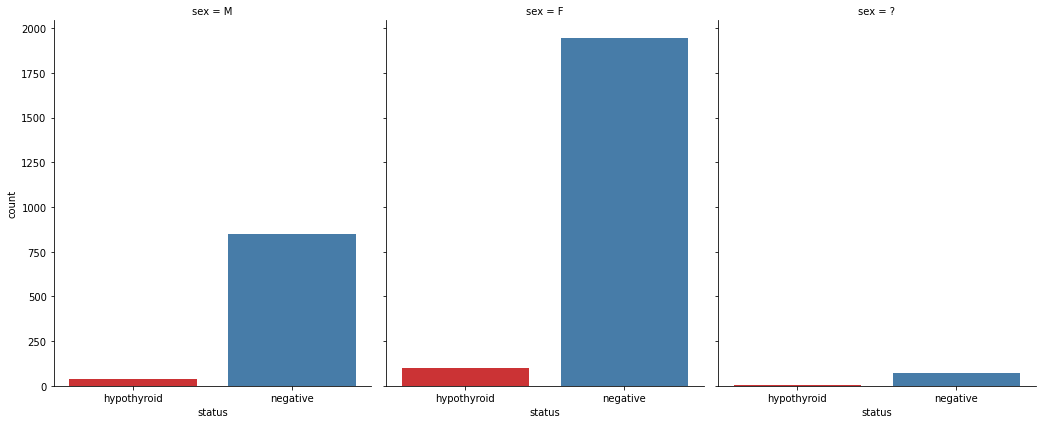

In [111]:
# Ploting the univariate summaries and recording our observations
#
# Plotting bar charts
#
# status distribution in regards to gender

sns.catplot("status", col="sex", col_wrap=4, data=hypo_data, kind="count", height=6, aspect=.8, palette='Set1')

plt.show()

 
*  The number of people suffering hypothyroid is quite high
*  There is a higher number of females suffering from this disease than men. A scientific study shows that 



**Age Distribution**

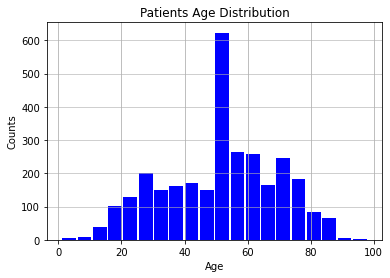

In [112]:
#visualizing age dirstibution
age = hypo_data['age']
age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='blue')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha = 0.75)

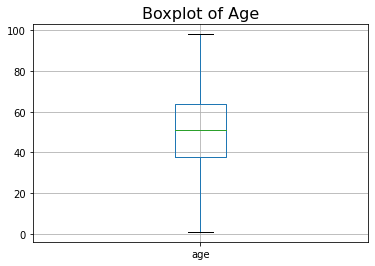

In [113]:
#checking for outliers using a boxplot
hypo_data.boxplot(column=['age'])
plt.title("Boxplot of Age",fontsize=16,color="black");



*   The age distribution is normal



**Sex**

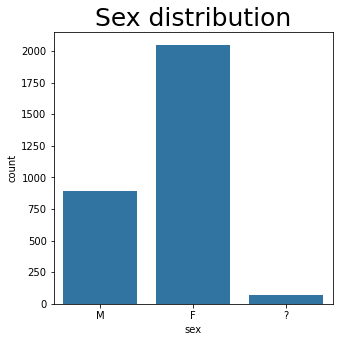

In [114]:
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(data = hypo_data, x = 'sex', color = base_color)

# add annotations
n_points = hypo_data.shape[0]
cat_counts = hypo_data['sex'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Sex distribution',fontsize=25);



*   There is more than half of the number of female than that of male in our dataset



f    2915
t      96
Name: goitre, dtype: int64


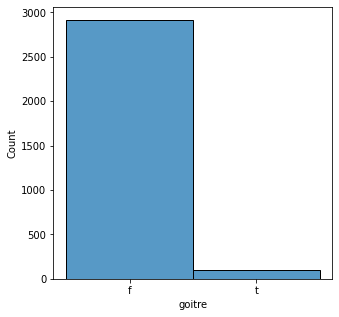

In [119]:
#frequency count for the categorical data
print(hypo_data['goitre'].value_counts())
#more patients did not have goitre
#visualising the counts
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(5,5))
sns.histplot(hypo_data['goitre'],bins = 2);

negative       2870
hypothyroid     141
Name: status, dtype: int64


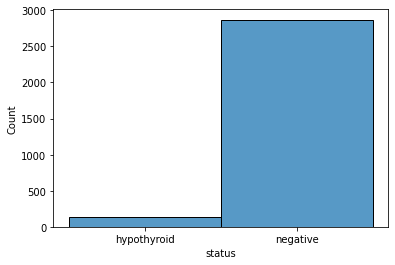

In [121]:
#frequency count for the categorical data
print(hypo_data['status'].value_counts())
#more patients tested negative for the hypthyroid
#visualising the counts
sns.histplot(hypo_data['status'],bins = 2);

f    2950
t      61
Name: pregnant, dtype: int64


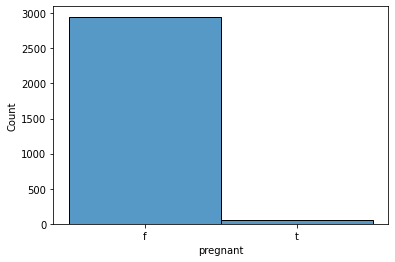

In [124]:
#frequency count for the categorical data
print(hypo_data['pregnant'].value_counts())
#the were fewer number of pregnancy
#visualising the counts
sns.histplot(hypo_data['pregnant'],bins = 2);

f    2914
t      97
Name: sick, dtype: int64


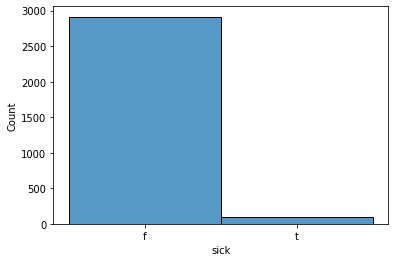

In [126]:
#frequency count for the categorical data
print(hypo_data['sick'].value_counts())
#for the people tested more were not sick
#visualising the counts
sns.histplot(hypo_data['sick'],bins = 2);

f    2971
t      40
Name: tumor, dtype: int64


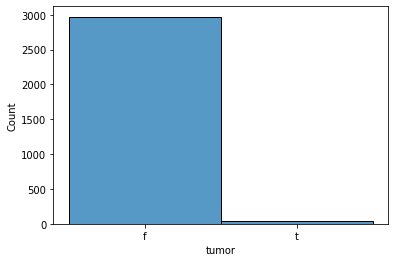

In [127]:
#frequency count for the categorical data
print(hypo_data['tumor'].value_counts())
#the were more female tested than the men
#visualising the counts
sns.histplot(hypo_data['tumor'],bins = 2)

**Distribution of other variables**

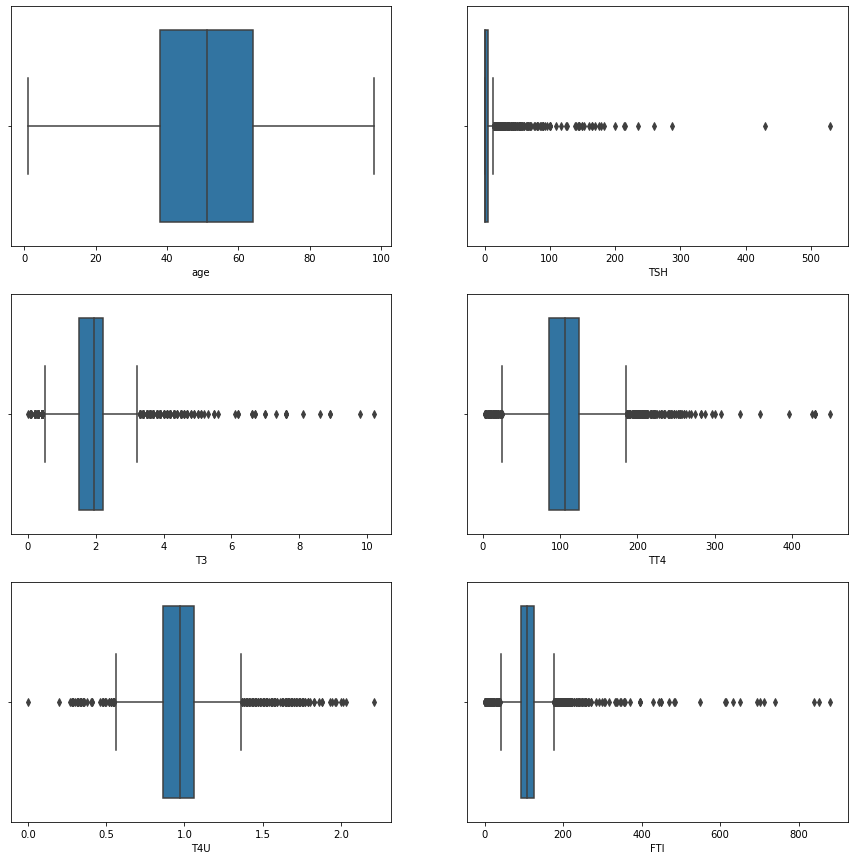

In [115]:
#checking for the presence of outliers
#created a list for all the numerical columns in our dataframe
#used a for loop to iterate over the list of the numerical columns so as to plot all the boxplots

numerical_columns = ['age','TSH', 'T3', 'TT4','T4U', 'FTI', 'TBG']
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(15,15))
for ax, data,column in zip(axes.flatten(),hypo_data,numerical_columns):
  sns.boxplot(hypo_data[column],ax=ax)

I decide to work with the outliers so as to gauge what impact they'll have on the models overally

### b) Bivariate Analysis

**Checking for Multicollinearity**

In [128]:
corr = hypo_data.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007764,-0.269295,-0.087409,-0.191145,0.018091
TSH,-0.007764,1.000000,-0.169663,-0.309021,0.072491,-0.240040
T3,-0.269295,-0.169663,1.000000,0.534040,0.386510,0.281658
TT4,-0.087409,-0.309021,0.534040,1.000000,0.320416,0.677343
T4U,-0.191145,0.072491,0.386510,0.320416,1.000000,-0.294438
FTI,0.018091,-0.240040,0.281658,0.677343,-0.294438,1.000000


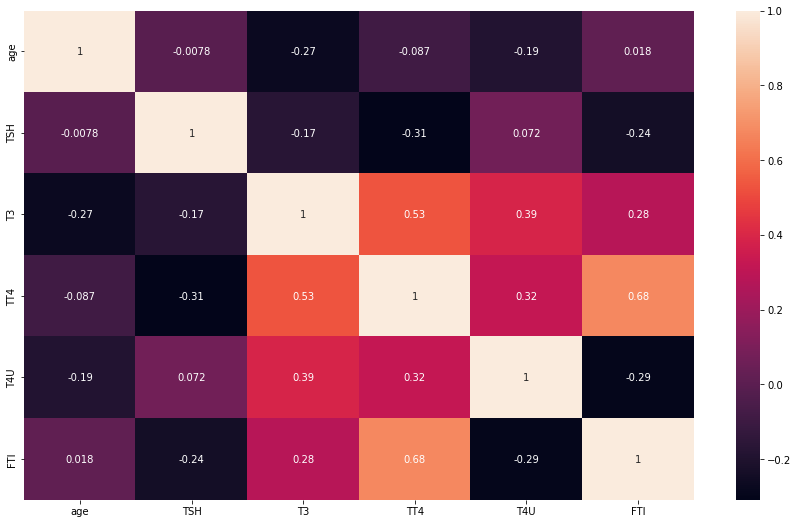

In [130]:
# Heat map
plt.figure(figsize=(15,9))
sns.heatmap(hypo_data.corr(), xticklabels = hypo_data.corr().columns, yticklabels = hypo_data.corr().columns, annot=True);

VIF

In [131]:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


,age,TSH,T3,TT4,T4U,FTI
age,1.096957,0.019605,0.304092,-0.109793,0.129335,0.011660
TSH,0.019605,1.178581,0.108321,0.674419,-0.437908,-0.333708
T3,0.304092,0.108321,1.618151,-0.444150,-0.517268,-0.286726
TT4,-0.109793,0.674419,-0.444150,4.622366,-2.426423,-3.556386
T4U,0.129335,-0.437908,-0.517268,-2.426423,2.769098,2.497086
FTI,0.011660,-0.333708,-0.286726,-3.556386,2.497086,4.144574


## 6. Implementing the Solution

### c) Multivariate Analysis

In [135]:
#encoding the data to convert categorical to numeric
hypo_df = pd.get_dummies(hypo_data,drop_first=True)
hypo_df

,age,TSH,T3,TT4,T4U,FTI,status_negative,sex_F,sex_M,on_thyroxine_t,...,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y
0,72.0,30.0,0.6,15.0,1.48,10.0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
1,15.0,145.0,1.7,19.0,1.13,17.0,0,1,0,1,...,0,0,0,0,0,1,1,1,1,1
2,24.0,0.0,0.2,4.0,1.00,0.0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3,24.0,430.0,0.4,6.0,1.04,6.0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,1
4,77.0,7.3,1.2,57.0,1.28,44.0,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,5.8,1.7,86.0,0.91,95.0,1,1,0,0,...,0,0,0,0,0,1,1,1,1,1
3159,29.0,0.8,1.8,99.0,1.01,98.0,1,1,0,0,...,0,0,0,0,0,1,1,1,1,1
3160,77.0,1.2,0.6,71.0,0.68,104.0,1,0,1,0,...,0,0,0,0,0,1,1,1,1,1
3161,74.0,1.3,0.1,65.0,0.48,137.0,1,1,0,0,...,0,0,0,0,0,1,1,1,1,1


In [136]:
#we are going to use LDA since it is supervised
 # Separating our target label (status) from the other features
features= hypo_df.drop(['status_negative'], 1)
hosp_label = hypo_df['status_negative']
test_features=features.columns.to_list()

# Subject our features to LDA model



# Create an instance of LDA
lda = LDA()

lda_= lda.fit(features, hosp_label)
lda_feat = lda_.transform(features)

# Display the coeficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=features.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
lithium_t,3.774621
T4U_measured_y,2.596953
tumor_t,1.277277
sick_t,1.183786
on_antithyroid_medication_t,1.037577
pregnant_t,0.993278
query_on_thyroxine_t,0.866169
sex_M,0.578816
sex_F,0.442921
T3,0.189495


#### 1. Random Forest 

In [137]:
#separating the data into label and features
y = hypo_df['status_negative']
X = hypo_df.drop(['status_negative'],axis =1)
#separating the data using train and test test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [138]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
forest=RandomForestClassifier()
params = {"max_depth": [2,8], "min_samples_split": [1, 3, 10],"n_estimators":[300,500]}
#searching for the best values of our model
search=GridSearchCV(estimator=forest,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [139]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#the max_depth is 10,min_samples_split is 3 and n_estimators is 100
#the rmse is 0.01 

{'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 300}


0.014113070539419088

In [140]:
#we fit the model using the parameters
forest = RandomForestClassifier(max_depth=8,min_samples_split=3,n_estimators=300)
forest.fit(X_train,y_train)
#making prediction
y_pred = forest.predict(X_test)

In [141]:
# And now we assess the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the rmse is 0.125 which is low and not far from what we got from the grid search
print('accuracy',metrics.accuracy_score(y_test,y_pred))
#our model is 98.42% accurate

Mean Absolute Error: 0.43283582089552236
Mean Squared Error: 0.011608623548922056
Root Mean Squared Error: 0.10774332252590903
accuracy 0.988391376451078


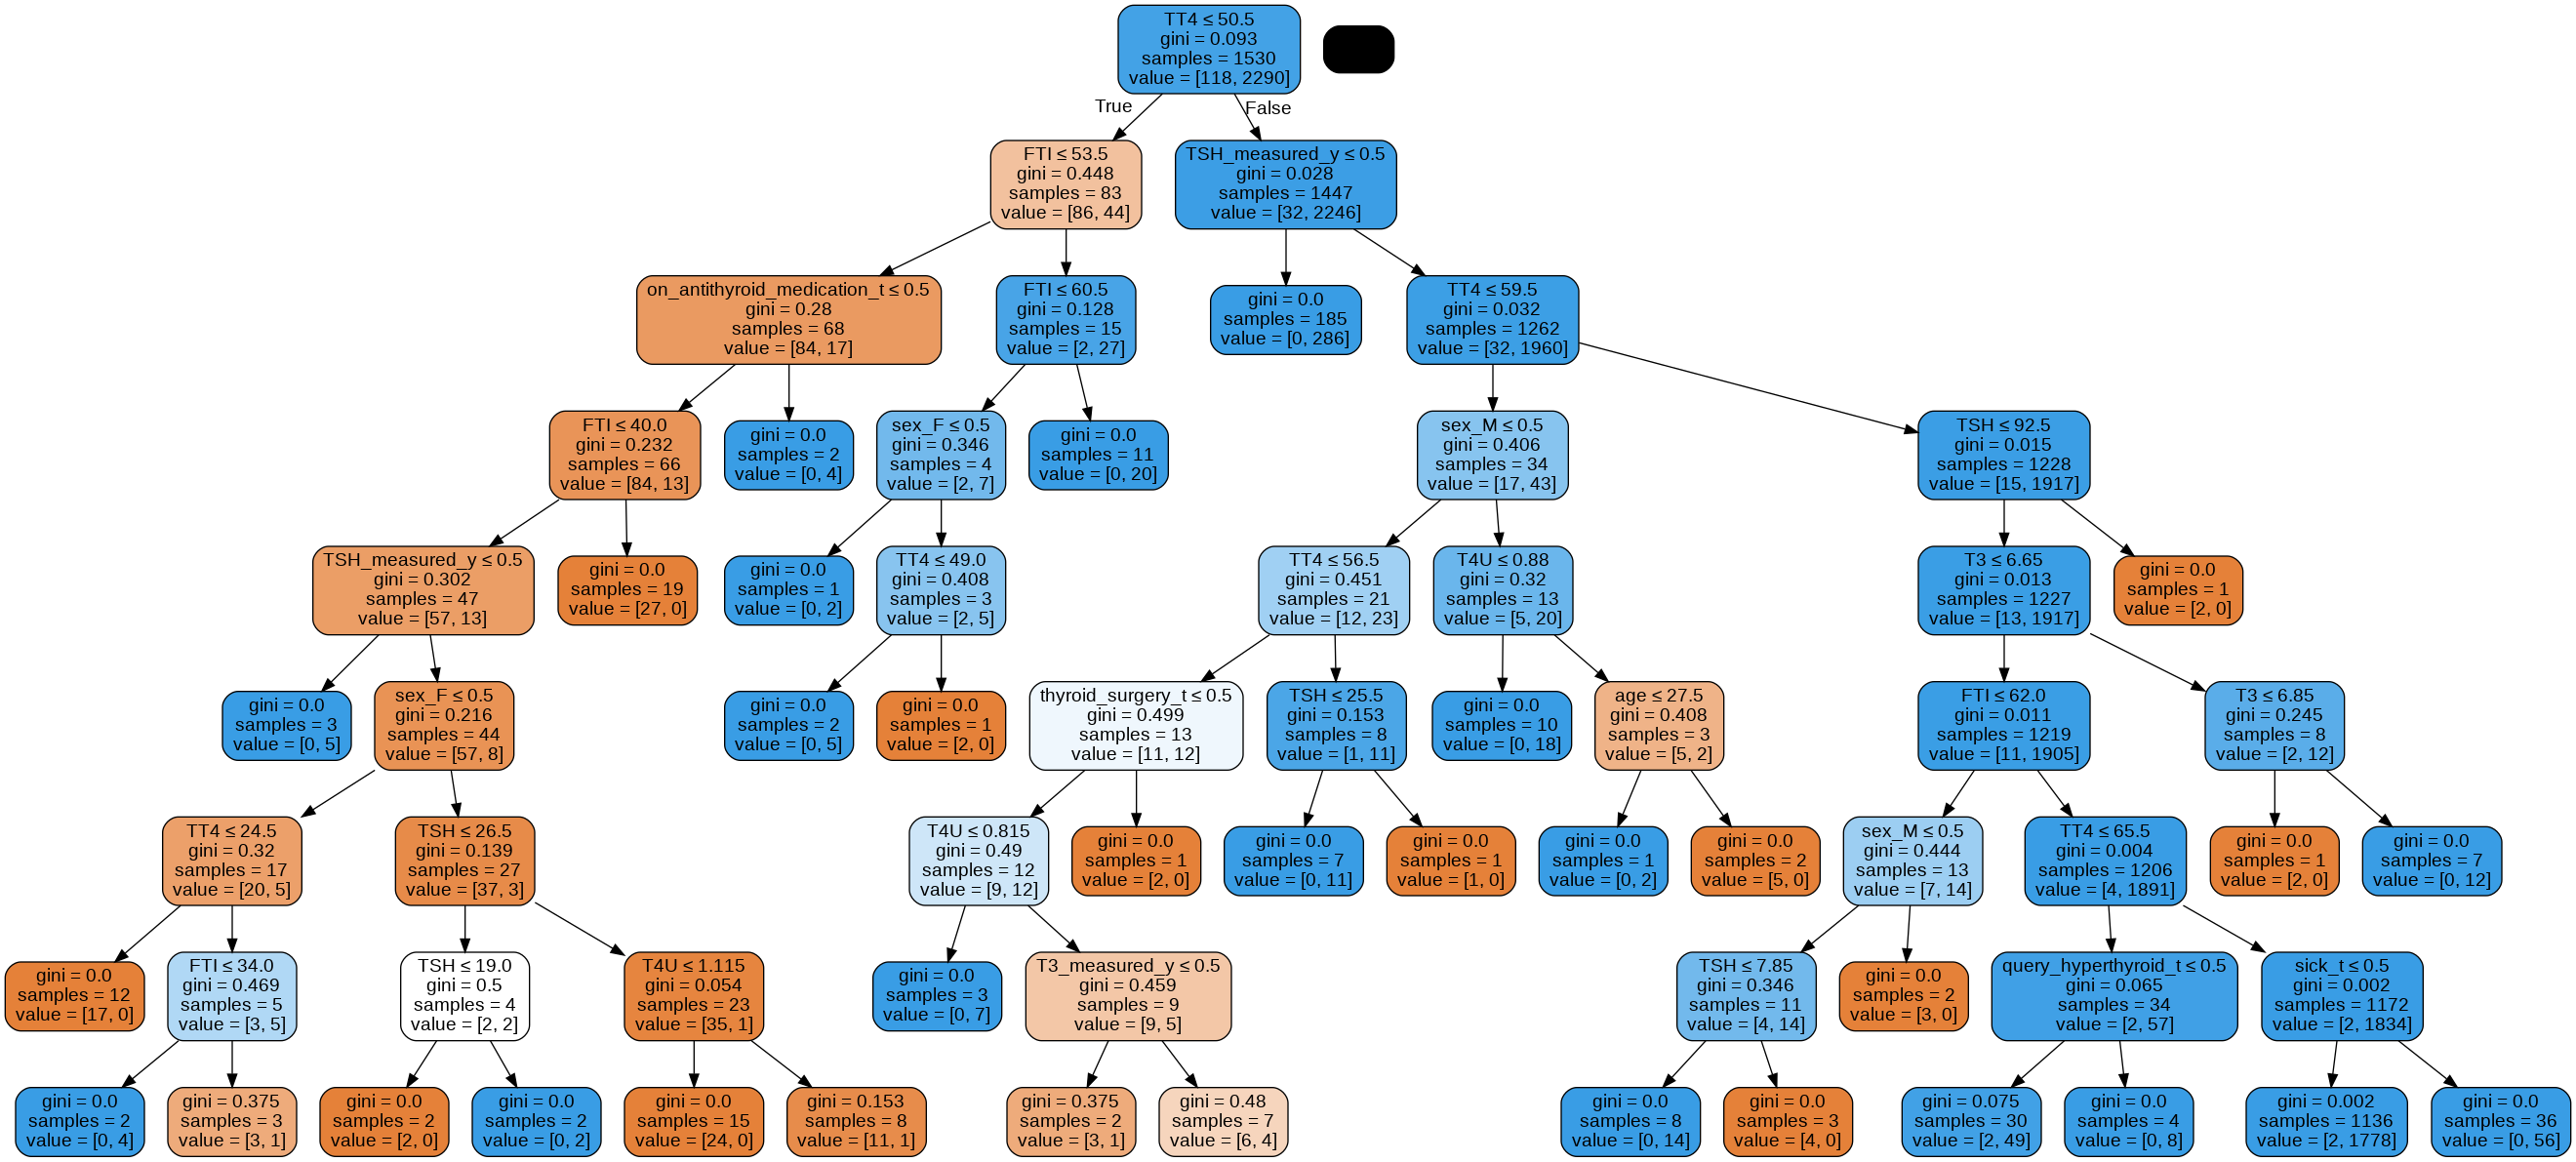

In [148]:
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
# pick a specific tree from the forest since our forest has 100 trees
#we pick tree 12
tree = forest.estimators_[12]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [149]:
#checking the important features in our data

importances = list(tree.feature_importances_)

# connecting  each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order, since we want  the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#we can seee our  most important feature is TSH followed by FTI

Variable: TT4                  Importance: 0.59
Variable: FTI                  Importance: 0.17
Variable: TSH                  Importance: 0.08
Variable: T4U                  Importance: 0.04
Variable: TSH_measured_y       Importance: 0.04
Variable: on_antithyroid_medication_t Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: sex_M                Importance: 0.02
Variable: age                  Importance: 0.01
Variable: thyroid_surgery_t    Importance: 0.01
Variable: sex_F                Importance: 0.0
Variable: on_thyroxine_t       Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: query_hypothyroid_t  Importance: 0.0
Variable: query_hyperthyroid_t Importance: 0.0
Variable: pregnant_t           Importance: 0.0
Variable: sick_t               Importance: 0.0
Variable: tumor_t              Importance: 0.0
Variable: lithium_t            Importance: 0.0
Variable: goitre_t             Importance: 0.0
Variable: T3_measured_y        Importance: 

#### 2. Ada Boost 



In [150]:
#using gridsearch to get the best number of max_depth,number of trees using 10 folds cross validations
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor()
params = {"n_estimators":[300,500]}
          #,'learning_rate':np.linspace(0.3,1,20)}
#searching for the best values for our parameters
search=GridSearchCV(estimator=ada_boost,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [151]:
#getting the best value for the learning rate,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
# n_estimators is 300
#the mse is 0.01 

{'n_estimators': 300}


0.015274260795485314

In [156]:
#we fit the model using the parameters from gridsearch
Adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=500,random_state=10)
Adaboost.fit(X_train,y_train)
#making prediction
y_pred = Adaboost.predict(X_test)

In [157]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
#the rmse is 0.131 which is not far from the gridsearch
#the accuracy is 99.17%

Mean Absolute Error: 1.2719734660033168
Mean Squared Error: 0.008291873963515755
Root Mean Squared Error: 0.09105972745135885
accuracy: 0.9917081260364843


#### 3. Gradient Boost

In [158]:
#using gridsearch to get the best number of max_depth,number of tress and the learning rate
gradient=GradientBoostingClassifier()
params = {"max_depth": [3,10], "learning_rate": [0.1, 0.7],"n_estimators":[50,100]}
#searching for the best parameters for our model
search=GridSearchCV(estimator=gradient,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [159]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#the max_depth is 3,learning_rate is 100 and n_estimators is 100
#the mse is 0.01

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


0.009547026279391423

In [160]:
#we fit the model using the parameters from the gridsearch
gradient = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=10)
gradient.fit(X_train,y_train)
#making prediction
y_pred = gradient.predict(X_test)

In [161]:
# And now we assess the errors in our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
#the rmse is 0.0.12 which is not far from the gridsearch rmse
#the accuracy is 99%

Mean Absolute Error: 0.8490878938640133
Mean Squared Error: 0.006633499170812604
Root Mean Squared Error: 0.08144629623753681
accuracy: 0.9933665008291874


Part 2

#### SVM

1. Linear Kernel

In [162]:
#our data has 24 features but we are going to use PCA to reduce the number of our features to 2
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#using the explained variance to get the features
explained_variance = pca.explained_variance_ratio_
explained_variance 
features = pd.DataFrame(explained_variance,X.columns,columns=['variance'])
features.sort_values(by='variance',ascending=False)

,variance
age,7.439134e-01
TSH,1.286462e-01
T3,7.631822e-02
TT4,5.083444e-02
T4U,8.744357e-05
FTI,6.427874e-05
sex_F,4.558693e-05
sex_M,2.089871e-05
on_thyroxine_t,1.218962e-05
query_on_thyroxine_t,1.110703e-05


In [163]:
#we are now going to use age and TSH since they are the most important
X = hypo_df[['age','TSH']]
y = hypo_df['status_negative']
# we split data into train and test.test_size =0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [164]:
#fitting a svm linear model
linear= SVC(kernel='linear')
linear.fit(X_train,y_train)
#making prediction
y_pred = linear.predict(X_test)

In [165]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 97% and it has correctly predicted 585 out of 623 observations

accuracy: 0.9701492537313433
confusion matrix : [[ 12  13]
 [  5 573]]


2. Polynomial Kernel

In [166]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
polyclassifier = SVC(kernel='linear')
params = {"degree":[2,10], "gamma":[0.001,100]}
#finding the best parameters
search=GridSearchCV(estimator=polyclassifier,param_grid=params,scoring='accuracy',n_jobs=1,refit=True,cv=5)

In [167]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#degree =2 and gamma = 0.001

{'degree': 2, 'gamma': 0.001}


0.9696828012180709

In [168]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=2,gamma=0.001)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
#using to make prediction
y_pred = polyclassifier.predict(X_test)

In [169]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 97% and it has correctly predicted 585 out of 623 observations

accuracy: 0.9701492537313433
confusion matrix : [[ 10  15]
 [  3 575]]


In [170]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
rbfclassifier = SVC(kernel='rbf')
params = {"C":[0.001,100], "gamma":[0.01,1000]}
#finding the best parameters
search=GridSearchCV(estimator=rbfclassifier,param_grid=params,scoring='accuracy',n_jobs=1,refit=True,cv=10)

In [171]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#c=100.gamma = 0.01

{'C': 100, 'gamma': 0.01}


0.9634647302904563

In [172]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',degree=2,gamma=0.001)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)
#using to make prediction
y_pred = rbfclassifier.predict(X_test)

In [173]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 97% and it has correctly predicted 585 out of 623 observations

accuracy: 0.9701492537313433
confusion matrix : [[ 14  11]
 [  7 571]]


## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

Most definitely, inorder to get deeper insights concerning the variables

### c). Did we have the right question?

Yes